# <font color='289C4E'>Kidney Stone Prediction based on Urine Analysis<font><a class='anchor' id='top'></a>

## <font color='289C4E'>`Task`: Develop ML/DL models to predict occurrence of kidney stones<font><a class='anchor' id='top'></a>

### <font color='289C4E'>Understanding the task:<font><a class='anchor' id='top'></a>
Predict the presence of kidney stones based on urine analysis. What does this really mean? We ultimately want to predict some target (X) by using various inputs(y)s. In this case we want to predict the presence of Kidney Stones, `1 = we see a presence` and `0 = We see no presence`, Therefore this is a `Binary Classification` problem where something exists or it doesn't. 


<center>
<img src="https://media.tenor.com/1Kj5k_AedcIAAAAd/what-else-could-it-be-friends.gif" width=400>
</center>

# <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
- [Kidney Stone Prediction](#1)
- [Task & Understanding the task:](#2)
- [Data Understanding I](#3)
- [Data Understanding II](#4)
- [Data Understanding III, Understanding our Features in Depth](#5)
- [Importing Libraries & Data](#6)
- [Load Data Modelling Libraries](#7)
- [Making our datasets available in our coding environment](#8)
- [Reading in our csv files and putting them into a dataframe object](#9)
- [Data.info() to see data types and nunique() for unique vals](#10)
- [Summary of our Datasets:](#11)
- [Observing if there are any Null-Values](#12)
- [Summary for Null-Values:](#13)
- [Checking for duplicate values](#14)
- [Summary for duplicate values](#15)
- [Inventory of Data Types](#16)
- [Getting some insight(min, max values)](#17)
- [Summary of data.min() and data.max()](#18)
- [Data Cleaning for 'id'](#19)
- [Exploratory Data Analysis (EDA)](#20)
- [Correlation Heatmap of Dataset](#21)



# <font color='289C4E'>Data Understanding I<font><a class='anchor' id='top'></a>


This dataset can be used to predict the presence of kidney stones based on urine analysis.

The `79 urine specimens`, were analyzed in an effort to
determine if certain `physical characteristics of the urine` might be related to the
formation of `calcium oxalate crystals`.

The `six physical characteristics` of the urine are: 

- `(1) specific gravity`, the density of the urine relative to water;
- `(2) pH`, the negative logarithm of the hydrogen ion; 
- `(3) osmolarity (mOsm)`, a unit used in biology and medicine but not in
physical chemistry. Osmolarity is proportional to the concentration of
molecules in solution;
- `(4) conductivity (mMho milliMho)`. One Mho is one reciprocal Ohm.
Conductivity is proportional to the concentration of charged
ions in solution; 
- `(5) urea concentration in millimoles per litre`;
- `(6) calcium concentration (CALC) in millimolesllitre`.

The data is obtained from 'Physical Characteristics of Urines With and Without Crystals',a chapter from Springer Series in Statistics.

https://link.springer.com/chapter/10.1007/978-1-4612-5098-2_45

# <font color='289C4E'>Data Understanding II<font><a class='anchor' id='top'></a>

There are two datasets, The original dataset and the generated dataset, we will be using both to compare and contrast features etc.

Files from the generated dataset:

- `train.csv` - the training dataset; `target` is the likelihood of a kidney stone being present
- `test.csv` - the test dataset; your objective is to `predict the probability of target`
- `sample_submission.csv` - a sample submission file in the correct format

Files from the original dataset:

- `kidney_stone_urine_analysis.csv`


# <font color='289C4E'>Data Understanding III, Understanding our Features in Depth<font><a class='anchor' id='top'></a>

- `specific gravity`: Urine specific gravity is a laboratory test that shows the concentration of all chemical particles in the urine. The normal range for urine specific gravity is `1.005 to 1.030`. USG is the ratio of the density (mass of a unit volume) of urine to the density (mass of the same unit volume) of a reference substance (water). USG values vary between 1.000 and 1.040 g/mL, USG less than 1.008 g/mL is regarded as dilute, and USG greater than 1.020 g/mL is considered concentrated. USG was higher in patients with stone formation than in those without stone formation (1.018±0.007 vs. 1.017±0.007). Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7844516/ 

- `pH` : When the pH of urine drops below 5.5, urine becomes saturated with uric acid crystals, a condition known as hypercalciuria. When there is too much uric acid in the urine, stones can form. Uric acid stones are more common in people who consume large amounts of protein, such as that found in red meat or poultry. Source: https://www.hopkinsmedicine.org/health/conditions-and-diseases/kidney-stones

- `osmolarity (mOsm)` : Osmolarity refers to the number of solute particles per 1 L of solvent


# <font color='289C4E'>Importing Libraries & Data<font><a class='anchor' id='top'></a>

In [26]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
from IPython.display import HTML, display
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.8.3 (v3.8.3:6f8c8320e9, May 13 2020, 16:29:34) 
[Clang 6.0 (clang-600.0.57)]
pandas version: 2.0.0
matplotlib version: 3.7.1
NumPy version: 1.24.2
SciPy version: 1.10.1
IPython version: 8.12.0
scikit-learn version: 1.2.2
-------------------------


# <font color='289C4E'>Load Data Modelling Libraries<font><a class='anchor' id='top'></a>

We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [2]:

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


# <font color='289C4E'>Making our datasets available in our coding environment<font><a class='anchor' id='top'></a>


In [3]:
PATH = "/kaggle/input/playground-series-s3e12"
TRAIN_FILENAME = "/Users/richeyjay/Desktop/Kidney_Stone_PredictionML/env/Code/train.csv"
TEST_FILENAME = "/Users/richeyjay/Desktop/Kidney_Stone_PredictionML/env/Code/test.csv"
SUBMISSION_FILENAME = "/Users/richeyjay/Desktop/Kidney_Stone_PredictionML/env/Code/sample_submission.csv"
ORIGINAL_PATH = "/kaggle/input/media-campaign-cost-prediction"
ORIGINAL_FILENAME = "/Users/richeyjay/Desktop/Kidney_Stone_PredictionML/env/Code/kidney_stone_urine_analysis.csv"

# <font color='289C4E'>Reading in our csv files and putting them into a dataframe object<font><a class='anchor' id='top'></a>

In [65]:
original_data = pd.read_csv(ORIGINAL_FILENAME)
print(original_data.shape)
print('-'*50)

train_data = pd.read_csv(TRAIN_FILENAME)
print(train_data.shape)
print('-'*50)

test_data = pd.read_csv(TEST_FILENAME)
print(test_data.shape)
print('-'*50)

(79, 7)
--------------------------------------------------
(414, 8)
--------------------------------------------------
(276, 7)
--------------------------------------------------


# <font color='289C4E'>Data.info() to see data types and nunique() for unique vals <font><a class='anchor' id='top'></a>

In [6]:
print(original_data.info())
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB
None
--------------------------------------------------


In [7]:
print(train_data.info())
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
None
--------------------------------------------------


In [8]:
print(test_data.info())
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB
None
--------------------------------------------------


In [66]:
cols = original_data.columns.to_list()
print(cols)
original_data[cols].nunique()

['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']


gravity    29
ph         70
osmo       77
cond       64
urea       73
calc       75
target      2
dtype: int64

In [67]:
cols = train_data.columns.to_list()
print(cols)
train_data[cols].nunique()

['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']


id         414
gravity     28
ph          71
osmo        80
cond        65
urea        73
calc        85
target       2
dtype: int64

In [68]:
cols = test_data.columns.to_list()
print(cols)
test_data[cols].nunique()

['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']


id         276
gravity     27
ph          62
osmo        75
cond        58
urea        71
calc        74
dtype: int64

# <font color='289C4E'>Summary of our Datasets:<font><a class='anchor' id='top'></a>

`Original Dataset`: 

- 79 Data Entries
- There are 7 columns 
- No 'id' column
- There are two types of data types within the features: float64(4), int64(3)
    - gravity: float64
    - ph: float64
    - osmo: int64  
    - cond: float64
    - urea: int64  
    - calc: float64
    - target: int64


`Train Dataset`: 

- 414 Data Entries
- There are 8 columns 
- 'id' column exists
- There are two types of data types within the features: float64(4), int64(4)
    - id: int64  
    - gravity: float64
    - ph: float64
    - osmo: int64  
    - cond: float64
    - urea: int64  
    - calc: float64
    - target: int64  


`Test Dataset`: 

- 276 Data Entries
- There are 7 columns 
- No 'target' column since this is the test dataset
- 'id' column exists
- There are two types of data types within the features: float64(4), int64(4)
    - id: int64  
    - gravity: float64
    - ph: float64
    - osmo: int64  
    - cond: float64
    - urea: int64  
    - calc: float64



# <font color='289C4E'>Observing small samples of our datasets with .head() in order to get familiar with how our dataset looks and is organized<font><a class='anchor' id='top'></a>


In [13]:
original_data.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [14]:
train_data.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [15]:
test_data.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


# <font color='289C4E'>Observing if there are any Null-Values<font><a class='anchor' id='top'></a>

In [23]:
print('Original columns with null values:\n')
print(original_data.isnull().sum())


Original columns with null values:

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64


In [24]:
print('Train columns with null values:\n')
print(train_data.isnull().sum())

Train columns with null values:

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64


In [25]:
print('Test columns with null values:\n')
print(test_data.isnull().sum())

Test columns with null values:

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64


# <font color='289C4E'>Summary for Null-Values:<font><a class='anchor' id='top'></a>

As we can see there contains no null values in all of our datasets, this saves us some time in the data cleaning process for we do not have to drop any columns or rows.

# <font color='289C4E'>Checking for duplicate values<font><a class='anchor' id='top'></a>

Select duplicate rows based on all columns. 

In [35]:
duplicate = original_data[original_data.duplicated()]
 
print("Duplicate Rows in the Original Dataframe:")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows in the Original Dataframe:


,gravity,ph,osmo,cond,urea,calc,target


In [34]:
duplicate = train_data[train_data.duplicated()]
 
print("Duplicate Rows in the Train Dataframe:")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows in the Train Dataframe:


,id,gravity,ph,osmo,cond,urea,calc,target


In [36]:
duplicate = test_data[train_data.duplicated()]
 
print("Duplicate Rows in the Train Dataframe:")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows in the Train Dataframe:


,id,gravity,ph,osmo,cond,urea,calc


# <font color='289C4E'>Summary for duplicate values<font><a class='anchor' id='top'></a>

As you can see there exists no duplicate values in our datasets

# <font color='289C4E'>Inventory of Data Types<font><a class='anchor' id='top'></a>

All of our features are `Numerical`

`Numerical` data refers to the data that is in the form of numbers, and not in any language or descriptive form. Often referred to as quantitative data, numerical data is collected in number form and stands different from any form of number data types due to its ability to be statistically and arithmetically calculated. 

There exists two subtypes of numerical data:

- `Discrete`

Discrete data – Discrete data is used to represent countable items. It can take both numerical and categorical forms and group them into a list. This list can be finite or infinite too. 
Discrete data basically takes countable numbers like 1, 2, 3, 4, 5, and so on. In the case of infinity, these numbers will keep going on. 

- `Continuous`

Continuous data – As the name says, this form has data in the form of intervals. Or simply said ranges. Continuous numerical data represent measurements and their intervals fall on a number line. Hence, it doesn’t involve taking counts of the items. 

Therefore most of these features if not all are continuous.

- gravity 	
- ph	
- osmo	
- cond	
- urea	
- calc

- target is binary
 


# <font color='289C4E'>Getting some insight(min, max values)<font><a class='anchor' id='top'></a>


In [55]:
print("Original Dataset Min Max vals:\n")
print(original_data.min().T)
print(original_data.max().T)


Original Dataset Description:

gravity      1.005
ph           4.760
osmo       187.000
cond         5.100
urea        10.000
calc         0.170
target       0.000
dtype: float64
gravity       1.04
ph            7.94
osmo       1236.00
cond         38.00
urea        620.00
calc         14.34
target        1.00
dtype: float64


In [56]:
print("Train Dataset Min Max vals:\n")
print(train_data.min().T)
print(train_data.max().T)

Train Dataset Description:

id           0.000
gravity      1.005
ph           4.760
osmo       187.000
cond         5.100
urea        10.000
calc         0.170
target       0.000
dtype: float64
id          413.00
gravity       1.04
ph            7.94
osmo       1236.00
cond         38.00
urea        620.00
calc         14.34
target        1.00
dtype: float64


In [58]:
print("Test Dataset Min Max vals:\n")
print(test_data.min().T)
print(test_data.max().T)

Test Dataset Min Max vals:

id         414.000
gravity      1.005
ph           4.900
osmo       187.000
cond         5.100
urea        64.000
calc         0.170
dtype: float64
id          689.000
gravity       1.034
ph            7.940
osmo       1236.000
cond         38.000
urea        620.000
calc         14.340
dtype: float64


# <font color='289C4E'>Summary of data.min() and data.max()<font><a class='anchor' id='top'></a>

In our original dataset we see a range of min values and max values as seen above


# <font color='289C4E'>Data Cleaning for 'id'<font><a class='anchor' id='top'></a>

In [59]:
#delete the ID column
drop_column = ['id']
train_data.drop(drop_column, axis=1, inplace = True)
print(train_data.isnull().sum())
print("-"*10)
print(test_data.isnull().sum())

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64
----------
id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64


# <font color='289C4E'>Exploratory Data Analysis (EDA)<font><a class='anchor' id='top'></a>

# <font color='289C4E'>Correlation Heatmap of Dataset<font><a class='anchor' id='top'></a>

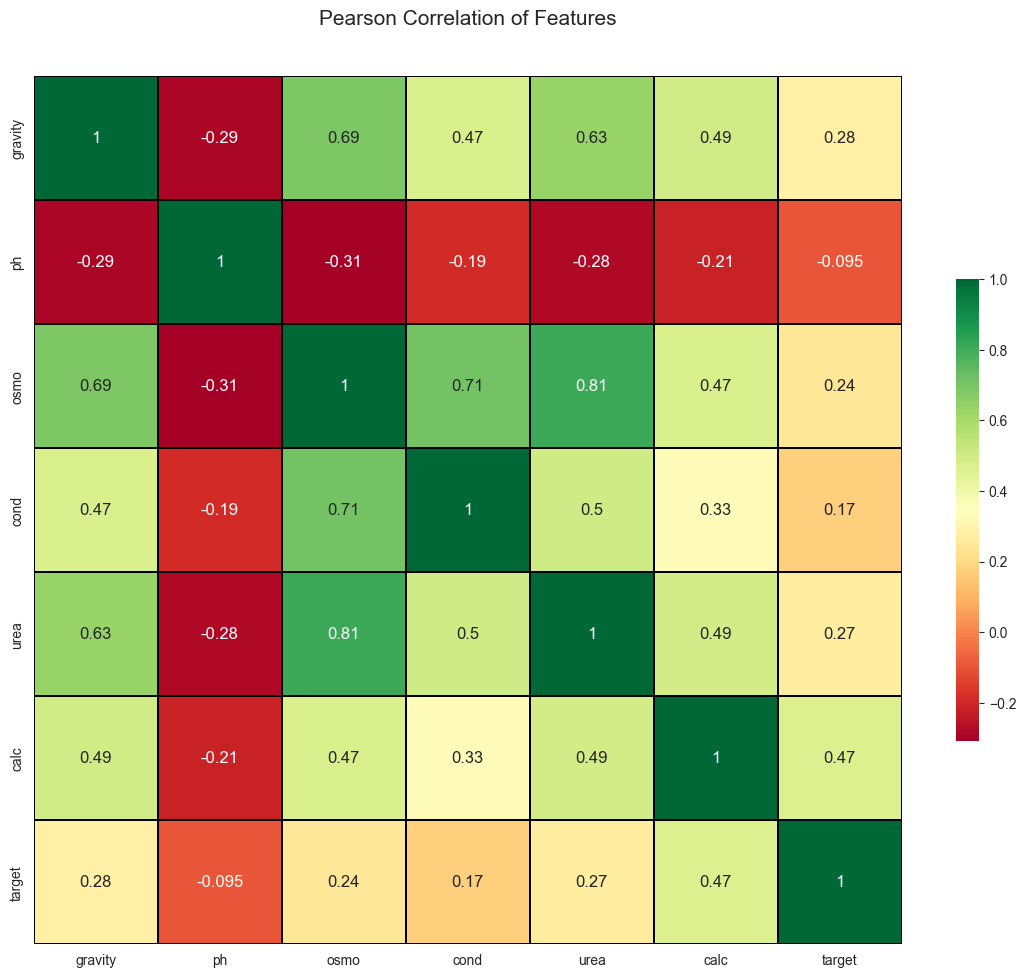

In [61]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "RdYlGn",
        square=True, 
        cbar_kws={'shrink':.5 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_data)

# <font color='289C4E'>Pair Plots<font><a class='anchor' id='top'></a>

<Figure size 1200x1000 with 0 Axes>

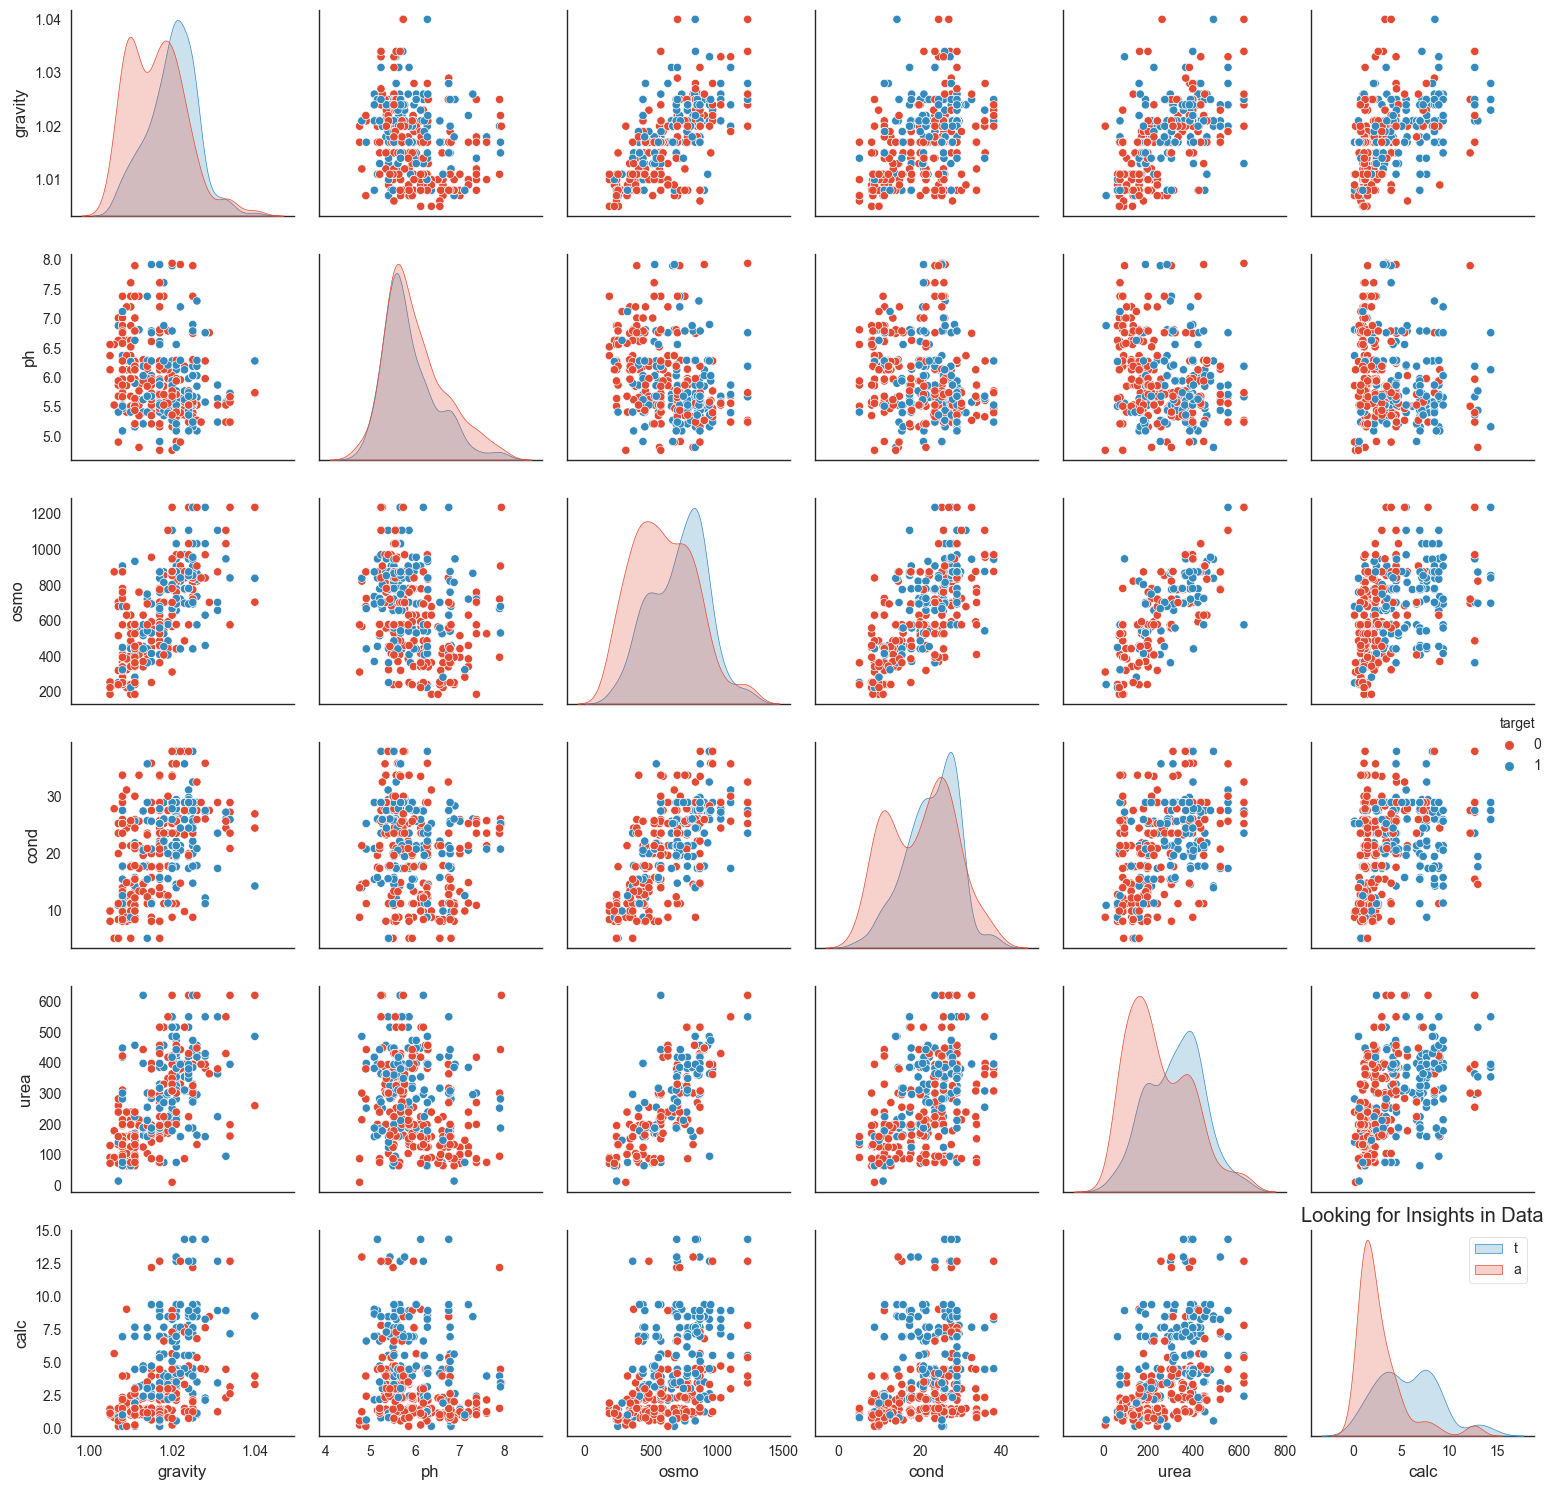

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,10))
sns.pairplot(train_data,hue="target")
plt.title("Looking for Insights in Data")
plt.legend("target")
plt.tight_layout()
plt.plot()
plt.show()

# <font color='289C4E'>Distribution of Data<font><a class='anchor' id='top'></a>

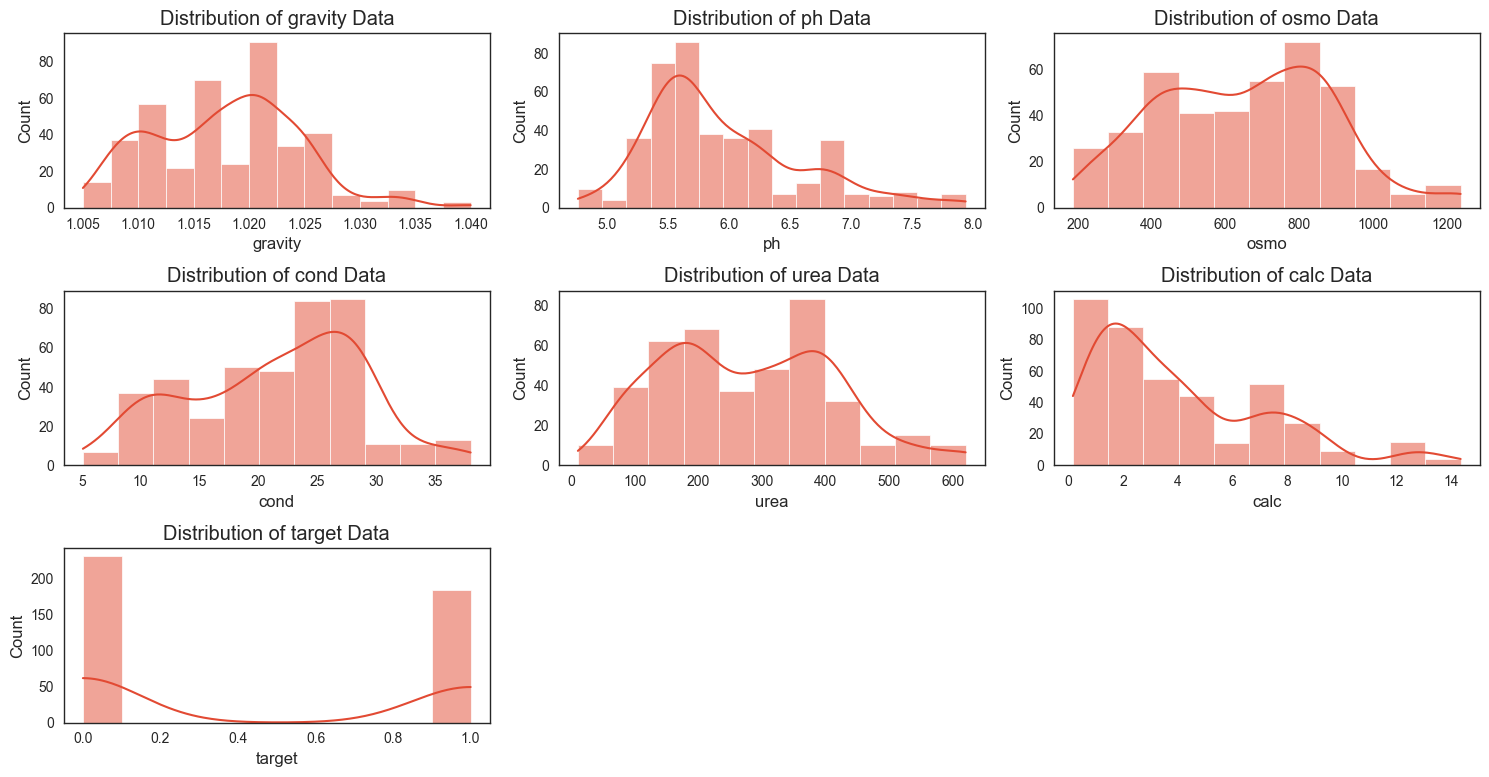

In [64]:
plt.figure(figsize=(15,10))
for i,col in enumerate(train_data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(train_data[col],kde=True)
    plt.tight_layout()
    plt.plot()
plt.show()